In [ ]:
!pip install streamlit langchain-groq langchain-experimental pandas matplotlib python-dotenv tabulate


In [ ]:
import os
os.environ["GROQ_API_KEY"] = "YOUR_GROQ_API_KEY"


/var/folders/8y/_hw9wkj532vf5h_q5n0tyf280000gp/T/ipykernel_14054/274785703.py:24: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  print(agent.run("Summarize the dataset in 3 bullet points."))


* The dataset contains 4346 entries across 14 columns, including financial metrics such as Open Price, Close Price, High Price, Low Price, Volume Traded, Market Cap, PE Ratio, Dividend Yield, EPS, 52 Week High, and 52 Week Low, as well as a Sector column for categorization.
* The dataset has a mix of data types, with 10 float64 columns, 1 int64 column, and 3 object columns, and the memory usage is approximately 475.5 KB.
* The summary statistics of the dataset show a wide range of values for the financial metrics, with means and standard deviations indicating significant variability, and the Sector column is not summarized in the `describe()` output, suggesting it is a categorical variable with multiple unique values.


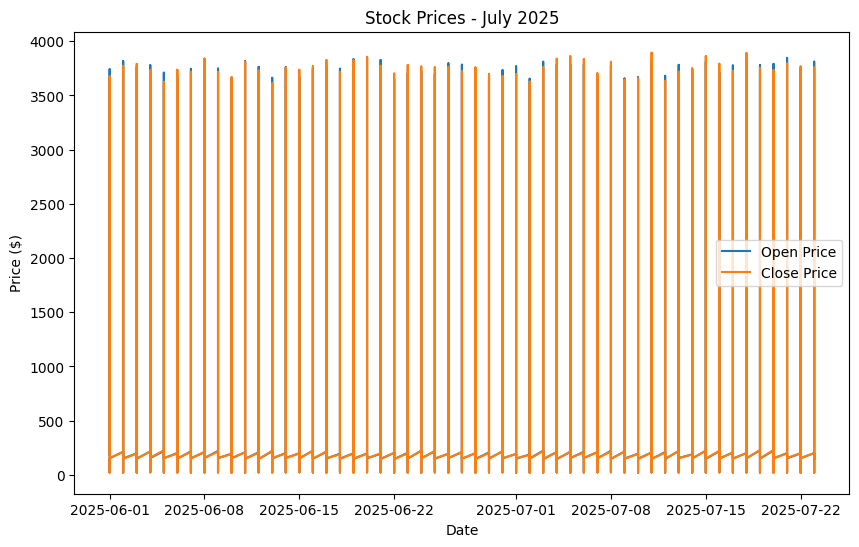

"The code to plot the 'Open Price' and 'Close Price' columns over time is:\n```python\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport matplotlib.dates as mdates\ndf['Date'] = pd.to_datetime(df['Date'])\nplt.figure(figsize=(10,6))\nplt.plot(df['Date'], df['Open Price'], label='Open Price')\nplt.plot(df['Date'], df['Close Price'], label='Close Price')\nplt.title('Stock Prices - June 2025')\nplt.xlabel('Date')\nplt.ylabel('Price ($)')\nplt.legend()\nplt.show()\n```"

In [9]:
from langchain_experimental.agents import create_pandas_dataframe_agent
from langchain_groq import ChatGroq
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV
df = pd.read_csv("/Users/akshayaa.s/agentic_ai/data_analyst/stock_data_july_2025.csv")

# Use a supported Groq model
llm = ChatGroq(
    model="llama-3.3-70b-versatile",
    temperature=0
)

# Create the agent
agent = create_pandas_dataframe_agent(
    llm,
    df,
    verbose=False,
    allow_dangerous_code=True
)

# Example: Summarization
print(agent.run("Summarize the dataset in 3 bullet points."))

# Example: Visualization request
agent.run("""
Plot the 'Open Price' and 'Close Price' columns over time,
use matplotlib with a title 'Stock Prices - July 2025'
and label the axes properly.
""")


In [ ]:
from langchain_experimental.agents import create_pandas_dataframe_agent
from langchain_groq import ChatGroq
import pandas as pd

# Load your CSV with your local path
df = pd.read_csv("/Users/akshayaa.s/agentic_ai/data_analyst/stock_data_july_2025.csv")

# Initialize Groq LLM with your chosen model
llm = ChatGroq(
    model="llama-3.3-70b-versatile",
    temperature=0
)

# Create Pandas DataFrame agent, allow dangerous code so plotting works
agent = create_pandas_dataframe_agent(
    llm,
    df,
    verbose=True,
    allow_dangerous_code=True
)

# Auto analysis prompt — ask the agent to explore & visualize on its own
auto_analysis_prompt = """
You are a data analyst.

1. Provide a concise summary of the dataset in 3 bullet points.
2. Generate 2-3 insightful visualizations relevant to the data.
3. Include clear titles and axis labels for all charts.
4. Briefly explain the insights from each visualization.

Automatically perform these tasks and provide the results.
"""

# Run the agent
result = agent.run(auto_analysis_prompt)

print(result)




> Entering new AgentExecutor chain...
Thought: To provide a concise summary of the dataset, I need to understand the structure and content of the dataframe. 

Action: python_repl_ast
Action Input: print(df.info())<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4346 non-null   object 
 1   Ticker          4346 non-null   object 
 2   Open Price      4346 non-null   float64
 3   Close Price     4346 non-null   float64
 4   High Price      4346 non-null   float64
 5   Low Price       4346 non-null   float64
 6   Volume Traded   4346 non-null   int64  
 7   Market Cap      4346 non-null   float64
 8   PE Ratio        4346 non-null   float64
 9   Dividend Yield  4346 non-null   float64
 10  EPS             4346 non-null   float64
 11  52 Week High    4346 non-null   float64
 12  52 Week Low     4346 non-null   float64
 13



> Entering new AgentExecutor chain...
Thought: To provide a concise summary of the dataset, I need to understand the structure and content of the dataframe. 

Action: python_repl_ast
Action Input: print(df.info())<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4346 non-null   object 
 1   Ticker          4346 non-null   object 
 2   Open Price      4346 non-null   float64
 3   Close Price     4346 non-null   float64
 4   High Price      4346 non-null   float64
 5   Low Price       4346 non-null   float64
 6   Volume Traded   4346 non-null   int64  
 7   Market Cap      4346 non-null   float64
 8   PE Ratio        4346 non-null   float64
 9   Dividend Yield  4346 non-null   float64
 10  EPS             4346 non-null   float64
 11  52 Week High    4346 non-null   float64
 12  52 Week Low     4346 non-null   float64
 13

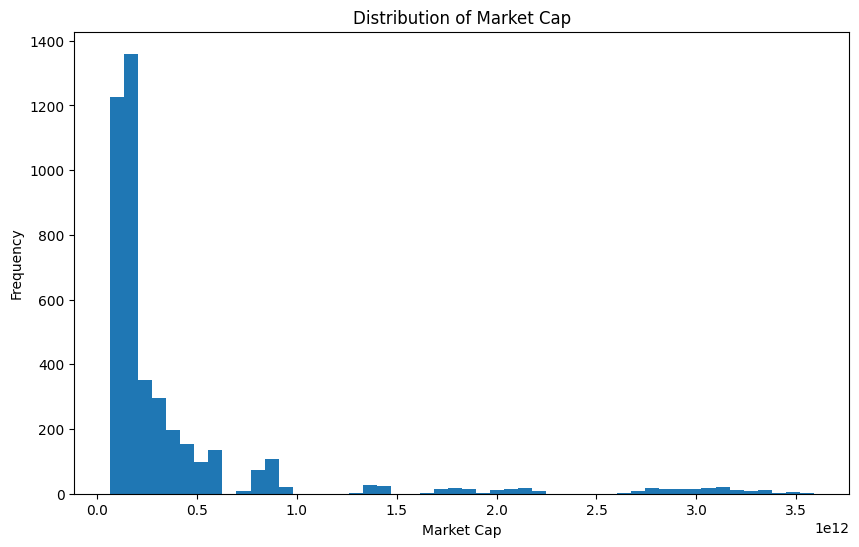

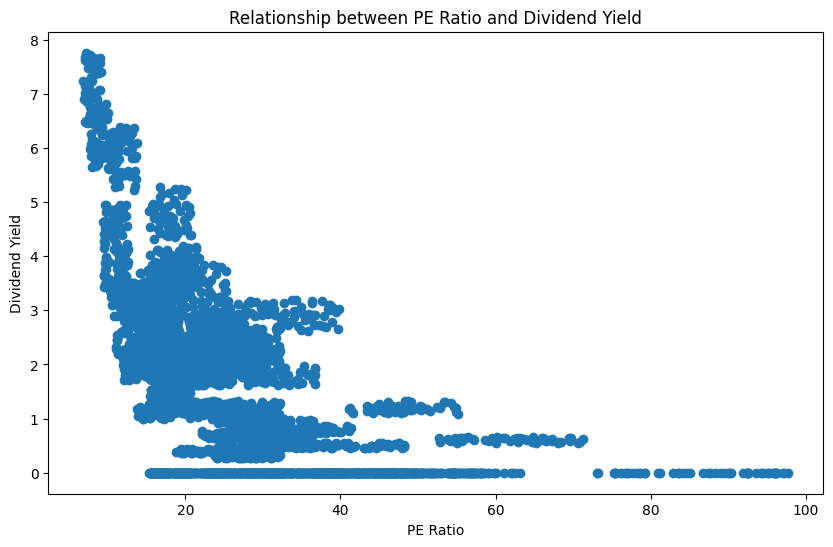

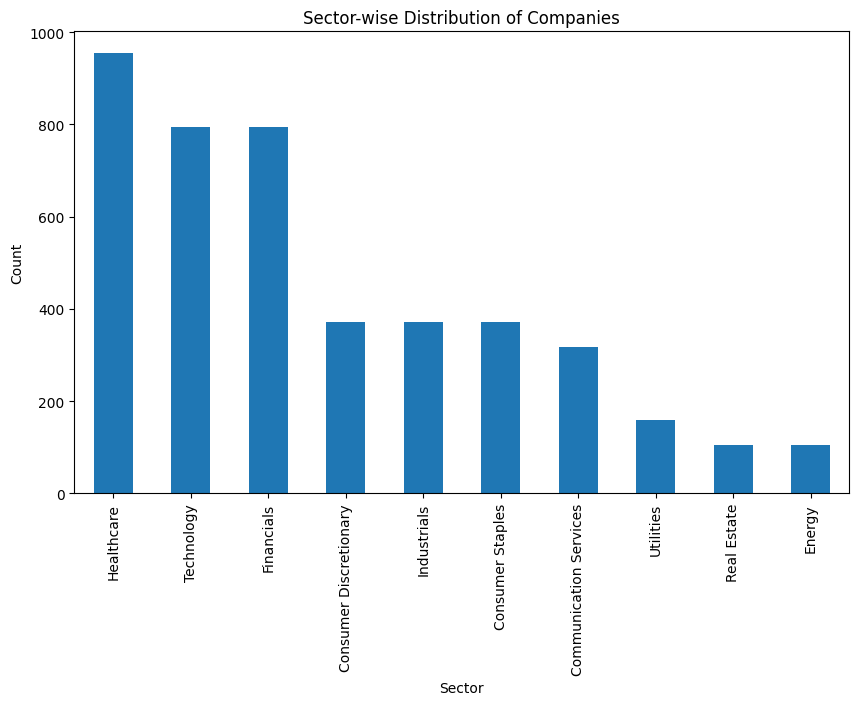

The provided code generates three visualizations:

1. A histogram of the distribution of Market Cap, which shows the frequency of different market capitalization values in the dataset.
2. A scatter plot of the relationship between PE Ratio and Dividend Yield, which helps to identify any correlations or patterns between these two financial metrics.
3. A bar chart of the sector-wise distribution of companies, which displays the number of companies in each sector.

These visualizations provide insights into the distribution of market capitalization, the relationship between PE ratio and dividend yield, and the sector-wise distribution of companies.

Here's a brief explanation of the insights from each visualization:

* The histogram of Market Cap shows a skewed distribution, with most companies having a market capitalization between 10^10 and 10^12. This suggests that the majority of companies in the dataset are large-cap companies.
* The scatter plot of PE Ratio and Dividend Yield shows 

In [11]:
import matplotlib.pyplot as plt

# Run your prompt (which includes plotting commands)
result = agent.run(auto_analysis_prompt)

print(result)

# Add this line to display any plots matplotlib generated
plt.show()

